# (4주차) Ch7 역행렬: 행렬 방정식의 만능 키

* 궁극적 목표 = 행렬 방정식을 푸는 것.
* 기본적인 행렬 방정식은 일반적인 방정식과 동일.
  * 하지만 항이 행렬.
* 역행렬은 실제 응용 과정에서 행렬 방정식을 해결할 때 꼭 필요
  * ex. 통계 모델의 데이터 적합

## Ch7.1 역행렬

## Ch7.2 역행렬의 유형과 가역성의 조건

## Ch7.3 역행렬의 계산

## Ch7.4 역행렬의 유일성

## Ch7.5 무어-펜로즈 의사역행렬

## Ch7.7 역행렬의 기하학적 해석

# Ch7 연습문제

**[연습 문제 7-3]**

행렬 원소 a,b,c,d를 사용해 2X2행렬에 대한 완전 역행렬 알고리즘을 손으로 구현하라.

(스칼라의 행렬식은 절댓값이라는 것에 유념하여라.)


In [55]:
import numpy as np

# 2x2 행렬의 역행렬을 계산하는 함수
def inverse_2x2(a, b, c, d):
    # 행렬식 계산
    det = a * d - b * c

    # 행렬식이 0인 경우 역행렬이 존재하지 않음
    if det == 0:
        raise ValueError("이 행렬은 역행렬을 가질 수 없습니다. 행렬식이 0입니다.")

    # 역행렬 계산
    inv_matrix = (1 / det) * np.array([[d, -b], [-c, a]])

    return inv_matrix

In [56]:
# 예시 행렬의 원소
a, b, c, d = 1, 2, 3, 4

print("원래 행렬:")
print(np.array([[a, b], [c, d]]))

원래 행렬:
[[1 2]
 [3 4]]


In [57]:
# 역행렬 계산
inv_A = inverse_2x2(a, b, c, d)

print("\n역행렬:")
print(inv_A)


역행렬:
[[-2.   1. ]
 [ 1.5 -0.5]]


**[연습 문제 7-4]**

왼쪽 역행렬을 구할 수 있었던 원리를 활용하여 넓은 행렬에 대한 오른쪽 역행렬을 유도하여라.

그런 다음 넓은 행렬에 대해 [그림7-4]를 재현하라.

In [58]:
import numpy as np

# 은 행렬 생성
W = np.random.randint(-10, 11, size=(4, 40))

# 랭크 확인
print(f'This matrix has rank={np.linalg.matrix_rank(W)}\n\n')

# 정방행렬 생성 (W @ W^T)
WWt = W @ W.T


print("W * W^T (square matrix):\n", WWt)

This matrix has rank=4


W * W^T (square matrix):
 [[1343 -155   54 -436]
 [-155 1786  472 -114]
 [  54  472 1579  305]
 [-436 -114  305 1748]]


In [59]:
# 역행렬 계산
WWt_inv = np.linalg.inv(WWt)

# 역행렬 출력
print("Inverse of W * W^T:\n", np.round(WWt_inv @ WWt, 4))

# 오른쪽 역행렬 계산
R = W.T @ WWt_inv

print("\nRight-inverse R:\n", R)

Inverse of W * W^T:
 [[ 1. -0. -0. -0.]
 [-0.  1. -0. -0.]
 [-0.  0.  1.  0.]
 [ 0. -0. -0.  1.]]

Right-inverse R:
 [[ 0.00527857 -0.00107132 -0.00158266 -0.00419792]
 [ 0.00359885 -0.00628058  0.00699192 -0.00416443]
 [-0.00059512 -0.00570487  0.00140173  0.00495575]
 [-0.002116    0.0034268   0.00374706  0.0019023 ]
 [ 0.00338846  0.00320321  0.00121645 -0.00201858]
 [ 0.00641417  0.00030947 -0.00469336  0.00301106]
 [-0.0018783  -0.00320062  0.00366847  0.00268725]
 [ 0.00354304 -0.00413982 -0.0048353  -0.00197506]
 [ 0.00665646  0.00535365 -0.00374932  0.00666824]
 [-0.00465956 -0.00257835 -0.00558502  0.00422078]
 [ 0.00298124 -0.00544928  0.00631915 -0.00185855]
 [ 0.00093251  0.00568817 -0.00086194  0.00533062]
 [-0.000904    0.00272441  0.00284958 -0.00569376]
 [-0.00592946  0.00360272 -0.00211188  0.00312905]
 [ 0.00652258  0.00502093  0.00283976  0.00260303]
 [ 0.00381596 -0.00133516  0.00611809 -0.00077487]
 [ 0.00621923 -0.00115973 -0.00294515 -0.00373132]
 [-0.00052465  0


W * R (should be close to identity matrix):
 [[ 1.  0. -0. -0.]
 [-0.  1.  0. -0.]
 [-0. -0.  1. -0.]
 [-0. -0.  0.  1.]]

R * W (not necessarily identity matrix):
 [[ 0.099031  0.064908 -0.043406 ...  0.050973  0.014648  0.017882]
 [ 0.064908  0.152965  0.020956 ...  0.093681 -0.01142   0.060785]
 [-0.043406  0.020956  0.109198 ... -0.038629 -0.044467 -0.003401]
 ...
 [ 0.050973  0.093681 -0.038629 ...  0.096367 -0.001629  0.053035]
 [ 0.014648 -0.01142  -0.044467 ... -0.001629  0.044143 -0.008979]
 [ 0.017882  0.060785 -0.003401 ...  0.053035 -0.008979  0.033133]]


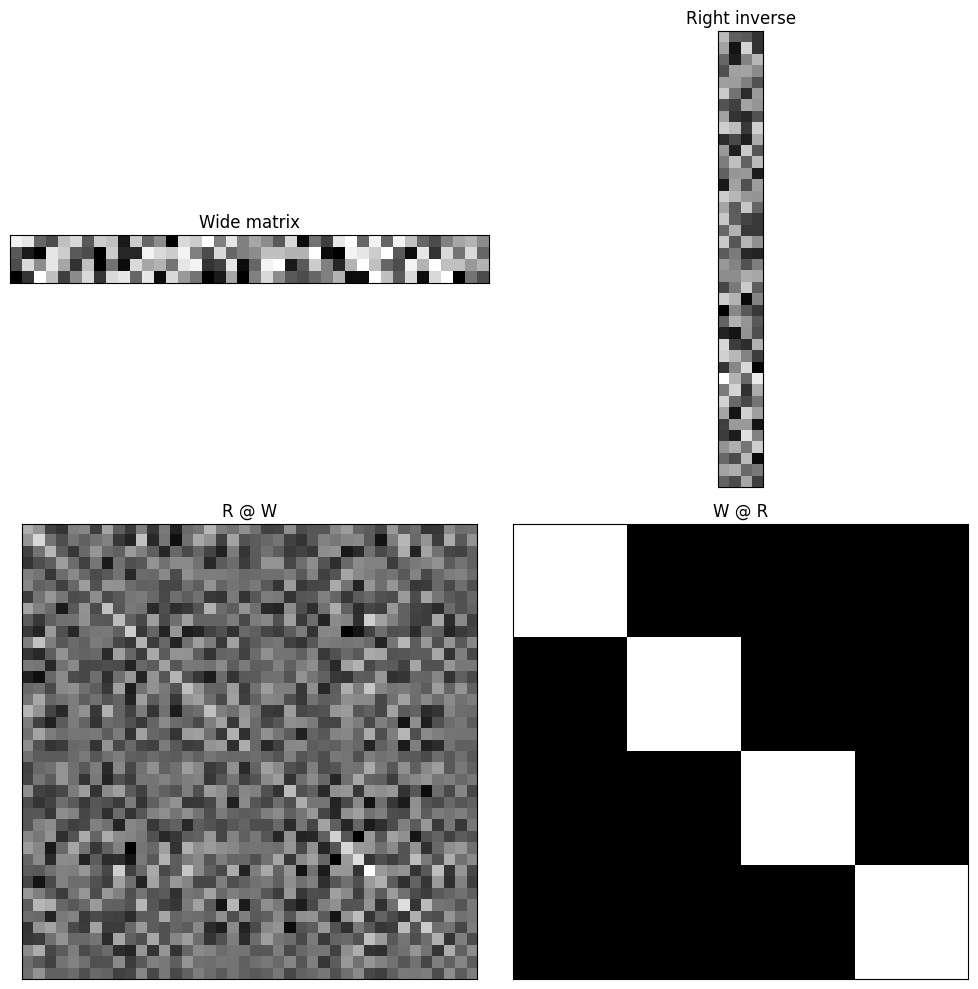

In [60]:
import matplotlib.pyplot as plt

# 오른쪽 역행렬 확인
print("\nW * R (should be close to identity matrix):\n", np.round(W @ R, 6))
print("\nR * W (not necessarily identity matrix):\n", np.round(R @ W, 6))

# 시각화
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(W, cmap='gray')
axs[0, 0].set_title('Wide matrix')

axs[0, 1].imshow(R, cmap='gray')
axs[0, 1].set_title('Right inverse')

axs[1, 0].imshow(R @ W, cmap='gray')
axs[1, 0].set_title('R @ W')

axs[1, 1].imshow(W @ R, cmap='gray')
axs[1, 1].set_title('W @ R')

for a in axs.flatten():
    a.set_xticks([])
    a.set_yticks([])

plt.tight_layout()
plt.show()

**[연습 문제 7-5]**

python에서 의사역행렬(np.linalg.pinv)를 통해, 이 가역 행렬의 완전 역행렬과 같다는 것을 구현하여라.

그리고 의사역행렬이 높은 최대열계수 행렬의 경우 왼쪽 역행렬과 같고,

넓은 최대계수 행렬의 경우 오른쪽 역행렬과 같다는 것을 나타내어라.

In [61]:
# 1. 가역 행렬과 의사역행렬 비교
def check_pinv_full_invertible():
    A = np.random.rand(4, 4)  # 4x4 가역 행렬 (랜덤으로 생성)

    # 완전 역행렬과 의사역행렬 계산
    A_inv = np.linalg.inv(A)       # 완전 역행렬
    A_pinv = np.linalg.pinv(A)     # 의사역행렬

    # 결과 비교
    print("가역 행렬의 완전 역행렬과 의사역행렬 비교:")
    print("A의 역행렬:\n", A_inv)
    print("\nA의 의사역행렬:\n", A_pinv)
    print("\n두 행렬이 동일한가? ", np.allclose(A_inv, A_pinv))

check_pinv_full_invertible()

가역 행렬의 완전 역행렬과 의사역행렬 비교:
A의 역행렬:
 [[ -3.6980431   -0.32859249   1.81432323   2.98520972]
 [  0.18424972   2.11709135  -0.51725867  -1.98323546]
 [ 10.60803355   1.60622117  -1.32622724 -11.55157767]
 [ -9.27965253  -3.12824998   0.94158262  13.46797934]]

A의 의사역행렬:
 [[ -3.6980431   -0.32859249   1.81432323   2.98520972]
 [  0.18424972   2.11709135  -0.51725867  -1.98323546]
 [ 10.60803355   1.60622117  -1.32622724 -11.55157767]
 [ -9.27965253  -3.12824998   0.94158262  13.46797934]]

두 행렬이 동일한가?  True


In [62]:
# 2. 높은 행렬에서 의사역행렬과 왼쪽 역행렬 비교
def check_pinv_left_inverse():
    A = np.random.rand(6, 4)  # 6x4 높은 행렬 (행 > 열)

    # 의사역행렬 계산
    A_pinv = np.linalg.pinv(A)

    # 왼쪽 역행렬: (A^T A)^{-1} A^T
    left_inverse = np.linalg.inv(A.T @ A) @ A.T

    # 결과 비교
    print("높은 행렬에서 의사역행렬과 왼쪽 역행렬 비교:")
    print("왼쪽 역행렬:\n", left_inverse)
    print("\n의사역행렬:\n", A_pinv)
    print("\n두 행렬이 동일한가? ", np.allclose(left_inverse, A_pinv))

check_pinv_left_inverse()

높은 행렬에서 의사역행렬과 왼쪽 역행렬 비교:
왼쪽 역행렬:
 [[ 0.68889903 -0.82970394  0.05016862 -0.34344946  0.63179425  0.24510044]
 [-0.80888388  0.64338405  0.47765312 -0.37999812 -0.46149969  0.76039145]
 [ 0.78828336  0.85362004 -0.6027724   0.2971595  -0.17906542 -0.58790327]
 [-0.53804782 -0.2892954   0.5095102   0.91073939  0.28246527 -0.33149346]]

의사역행렬:
 [[ 0.68889903 -0.82970394  0.05016862 -0.34344946  0.63179425  0.24510044]
 [-0.80888388  0.64338405  0.47765312 -0.37999812 -0.46149969  0.76039145]
 [ 0.78828336  0.85362004 -0.6027724   0.2971595  -0.17906542 -0.58790327]
 [-0.53804782 -0.2892954   0.5095102   0.91073939  0.28246527 -0.33149346]]

두 행렬이 동일한가?  True


In [63]:
# 3. 넓은 행렬에서 의사역행렬과 오른쪽 역행렬 비교
def check_pinv_right_inverse():
    A = np.random.rand(4, 6)  # 4x6 넓은 행렬 (행 < 열)

    # 의사역행렬 계산
    A_pinv = np.linalg.pinv(A)

    # 오른쪽 역행렬: A^T (A A^T)^{-1}
    right_inverse = A.T @ np.linalg.inv(A @ A.T)

    # 결과 비교
    print("넓은 행렬에서 의사역행렬과 오른쪽 역행렬 비교:")
    print("오른쪽 역행렬:\n", right_inverse)
    print("\n의사역행렬:\n", A_pinv)
    print("\n두 행렬이 동일한가? ", np.allclose(right_inverse, A_pinv))

check_pinv_right_inverse()

넓은 행렬에서 의사역행렬과 오른쪽 역행렬 비교:
오른쪽 역행렬:
 [[ 8.07554846e-01  7.06706355e-01 -4.87859113e-01 -8.24553614e-01]
 [ 4.69975222e-01  1.46790211e+00 -5.25709222e-01 -1.00182697e+00]
 [ 4.41208220e-04  3.63599696e-02 -3.74211908e-01  1.02632957e+00]
 [-5.58943727e-01  1.43492041e-01  5.60546666e-01  8.74527091e-02]
 [-5.27261112e-01 -1.09728512e+00  9.25127560e-01  9.84729647e-01]
 [ 1.06821425e+00 -5.47125068e-02 -7.74649085e-02 -6.88189801e-01]]

의사역행렬:
 [[ 8.07554846e-01  7.06706355e-01 -4.87859113e-01 -8.24553614e-01]
 [ 4.69975222e-01  1.46790211e+00 -5.25709222e-01 -1.00182697e+00]
 [ 4.41208220e-04  3.63599696e-02 -3.74211908e-01  1.02632957e+00]
 [-5.58943727e-01  1.43492041e-01  5.60546666e-01  8.74527091e-02]
 [-5.27261112e-01 -1.09728512e+00  9.25127560e-01  9.84729647e-01]
 [ 1.06821425e+00 -5.47125068e-02 -7.74649085e-02 -6.88189801e-01]]

두 행렬이 동일한가?  True


**[연습 문제 7-9]**

힐버트 행렬을 사용하여 역행렬과 수치 불안정성의 위험을 살펴보아라.

힐버트 행렬을 생성하고 [식7-1]에 맞춰 정수를 입력으로 받아 힐버트 행렬을 출력으로 생성하는 python 함수를 작성하여라.

그리고 [그림7-5]를 재현하라.

수학 공식에 따라 행과 열(i,j 행렬 인덱스)에 대해 이중for문을 사용하여라.

함수가 올바른지 확인했다면 선택 사항으로 for 반복문을 사용하지 않고 함수를 다시 작성하여라. (힌트 : 외적)

(함수의 정확성은 scipy.linalg 라이브러리에 있는 힐버트 함수와 비교하여 확인할 수 있다.)

In [64]:
from scipy.linalg import hilbert, invhilbert

# 이중 for문을 사용한 힐버트 행렬 생성 함수
def create_hilbert_matrix(n):
    H = np.zeros((n, n))  # n x n 행렬 초기화
    for i in range(n):
        for j in range(n):
            H[i, j] = 1 / (i + j + 1)  # 힐버트 행렬 공식
    return H

# 외적을 사용하여 힐버트 행렬 생성 함수
def create_hilbert_matrix_outer(n):
    i = np.arange(1, n + 1)
    j = np.arange(1, n + 1)
    H = 1.0 / (i[:, None] + j[None, :] - 1)  # 외적을 사용하여 계산
    return H

# 힐버트 행렬 생성 및 역행렬 계산
n = 10  # 크기
H = create_hilbert_matrix(n)
H_inv = np.linalg.inv(H)

# SciPy 힐버트 행렬 함수와 비교
H_scipy = hilbert(n)
H_inv_scipy = invhilbert(n)
print("힐버트 행렬과 SciPy 비교:", np.allclose(H, H_scipy))
print("힐버트 역행렬과 SciPy 역행렬 비교:", np.allclose(H_inv, H_inv_scipy))

힐버트 행렬과 SciPy 비교: True
힐버트 역행렬과 SciPy 역행렬 비교: False


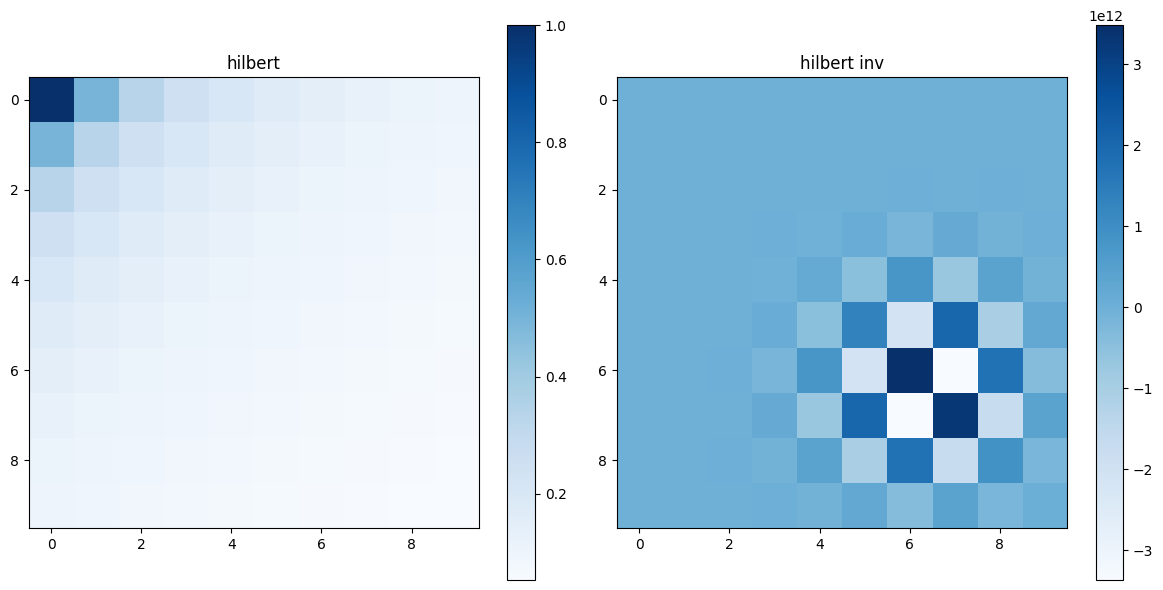

In [65]:
# 시각화 (그림 7-5)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# 힐버트 행렬
cax1 = axs[0].imshow(H, cmap='Blues')
axs[0].set_title("hilbert")
fig.colorbar(cax1, ax=axs[0])

# 힐버트 역행렬
cax2 = axs[1].imshow(H_inv, cmap='Blues')
axs[1].set_title("hilbert inv")
fig.colorbar(cax2, ax=axs[1])

plt.tight_layout()
plt.show()

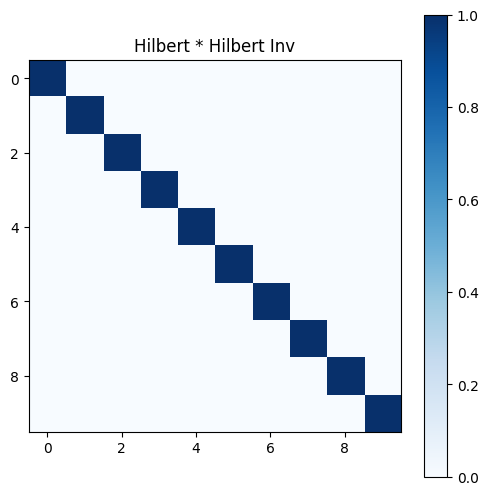

vs :  True
Inv vs :  False


In [66]:
# 곱
H_product = H @ H_inv

# 시각화
plt.figure(figsize=(6, 6))
plt.imshow(H_product, cmap='Blues')
plt.title("Hilbert * Hilbert Inv")
plt.colorbar()
plt.show()

# 비교
H_scipy = hilbert(n)
H_inv_scipy = invhilbert(n)

print("vs : ", np.allclose(H, H_scipy))
print("Inv vs : ", np.allclose(H_inv, H_inv_scipy))

**[연습 문제 7-10]**

힐버트 행렬 함수를 사용하여 힐버트 행렬을 만들고

np.linalg.inv를 사용하여 그 역을 계산하고 두 행렬의 곱을 계산하여라.

(이 곱은 단위 행렬과 일치, 즉 이 곱과 np.eye가 생성한 실제 단위 행렬 사이의 유클리드 거리는 0이어야 한다.)

다양한 행렬 크기 범위에 대해 수행 가능하도록 for문에 넣어라.

각 행렬 크기에 대해 유클리드 거리와 힐버트 행렬의 조건수를 저장하여라.

(조건수는 행렬에서 수칫값의 퍼짐 정도를 나타내는 척도이며, np.linalg.cond를 통해 얻을 수 있다.)

그리고 힐버트 행렬 대신 가우스 난수 행렬을 사용하여 이전 코드를 되풀이 하여라.

마지막으로 모든 결과를 그래프로 표시하여라.

(거리와 조건수를 로그 척도로 그리면 시각적 해석이 용이하다.)

In [67]:
matSizes = np.arange(3, 13)

# 배열 초기화
identityError = np.zeros((len(matSizes), 2))
condNumbers = np.zeros((len(matSizes), 2))

# 힐버트 행렬
for i, k in enumerate(matSizes):
    H = hilbert(k)       # 힐버트 행렬
    Hi = np.linalg.inv(H) # 역행렬
    HHi = H @ Hi         # 곱

    # 유클리드 거리
    err = HHi - np.eye(k)
    identityError[i, 0] = np.sqrt(np.sum(err**2))

    # 힐버트 행렬의 조건수 계산
    condNumbers[i, 0] = np.linalg.cond(H)

print("Euclidean D:", identityError[:, 0])
print("H Matrix Condition N:", condNumbers[:, 0])

Euclidean D: [9.37428330e-15 3.80709417e-13 1.05584028e-11 2.61796623e-10
 8.23867096e-09 2.48495030e-07 4.92949020e-06 1.56508748e-04
 5.80982771e-03 2.17344996e-01]
H Matrix Condition N: [5.24056778e+02 1.55137387e+04 4.76607250e+05 1.49510586e+07
 4.75367357e+08 1.52575755e+10 4.93153756e+11 1.60244170e+13
 5.22270132e+14 1.75159523e+16]


In [68]:
# 가우스 난수 행렬 작업
for i, k in enumerate(matSizes):
    G = np.random.randn(k, k) # 가우스 난수 행렬
    Gi = np.linalg.inv(G)     # 역행렬
    GGi = G @ Gi              # 곱

    # 유클리드 거리
    err = GGi - np.eye(k)
    identityError[i, 1] = np.sqrt(np.sum(err**2))

    # 가우스 난수 행렬의 조건수 계산
    condNumbers[i, 1] = np.linalg.cond(G)

print("Random Matrix Euclidean D:", identityError[:, 1])
print("Random Matrix Condition N:", condNumbers[:, 1])

Random Matrix Euclidean D: [3.85068536e-16 6.74296296e-16 1.18591115e-15 1.13909265e-15
 1.12604569e-15 1.75242104e-15 1.04804865e-14 2.24468392e-15
 7.61082127e-15 1.02261791e-14]
Random Matrix Condition N: [  5.73374537  16.86020409  11.90109472  12.42617089  25.06730965
  22.15253743 136.44762217  25.92799418  96.68387594  83.81823575]


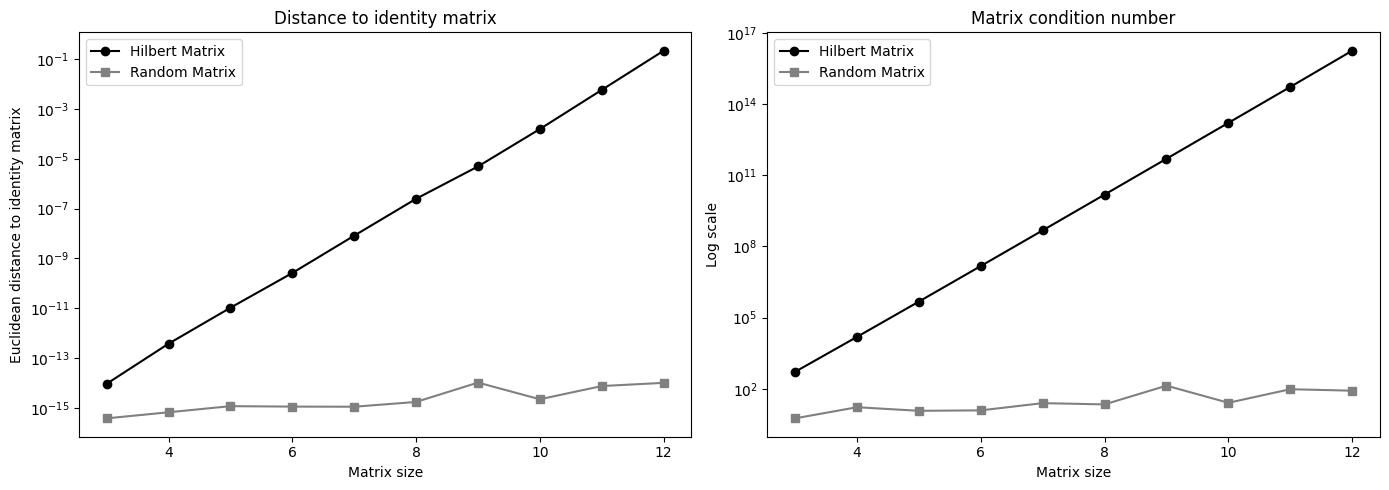

In [69]:
# 시각화 부분
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# 유클리드 거리 비교
axs[0].plot(matSizes, identityError[:, 0], 'o-', color='k', label='Hilbert Matrix')
axs[0].plot(matSizes, identityError[:, 1], 's-', color='gray', label='Random Matrix')

axs[0].set_yscale('log')  # y축 로그 스케일 설정
axs[0].set_xlabel('Matrix size')
axs[0].set_ylabel('Euclidean distance to identity matrix')
axs[0].set_title('Distance to identity matrix')
axs[0].legend()

# 조건수
axs[1].plot(matSizes, condNumbers[:, 0], 'o-', color='k', label='Hilbert Matrix')
axs[1].plot(matSizes, condNumbers[:, 1], 's-', color='gray', label='Random Matrix')

axs[1].set_yscale('log')  # y축 로그 스케일 설정
axs[1].set_xlabel('Matrix size')
axs[1].set_ylabel('Log scale')
axs[1].set_title('Matrix condition number')
axs[1].legend()

plt.tight_layout()
plt.show()